In [1]:
# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)
# import sys
# sys.path.insert(1, "/content/drive/My Drive/ML2/project2")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
%load_ext autoreload
%autoreload 2
import torch
from torch.optim import Adam
from matplotlib import pyplot as plt
from utils import get_mnist_data
from models import ConvNN, SmoothClassifier
from training_and_evaluation import train_model
from torch.nn.functional import cross_entropy

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Project 2, part 3: Randomized smoothing training (60 pt)
In this notebook we train a smooth classifier via the principle of randomized smoothing.

## Your task
Complete the missing code in the respective files, i.e. `models.py`, and this notebook. Make sure that all the functions follow the provided specification, i.e. the output of the function exactly matches the description in the docstring. 

Specifically, for this part you will have to implement the following functions / classes:  
**`models.py`**:
* `SmoothClassifier`:
 * `certify` (20pt)
 * `predict` (20pt)
 * `_sample_noise_predictions` (20pt)

## General remarks
Do not add or modify any code outside of the following comment blocks, or where otherwise explicitly stated.

``` python
##########################################################
# YOUR CODE HERE
...
##########################################################
```
After you fill in all the missing code, restart the kernel and re-run all the cells in the notebook.

The following things are **NOT** allowed:
- Using additional `import` statements
- Copying / reusing code from other sources (e.g. code by other students)

If you plagiarise even for a single project task, you won't be eligible for the bonus this semester.

In [3]:
mnist_trainset = get_mnist_data(train=True)
mnist_testset = get_mnist_data(train=False)
use_cuda = torch.cuda.is_available()
base_classifier = ConvNN()
if use_cuda:
    base_classifier = base_classifier.cuda()

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


In [0]:
sigma = 1
batch_size = 128
lr = 1e-3
epochs = 1

### Creating a smooth classifier
Implement the `SmoothClassifier` class in `models.py` and follow the docstrings there.

In [0]:
model = SmoothClassifier(base_classifier=base_classifier, num_classes=10, sigma=sigma)
opt = Adam(model.parameters(), lr=lr)

In [0]:
def loss_function(x, y, model):
    logits = model(x).cpu()
    loss = cross_entropy(logits, y)
    return loss, logits

In [7]:
losses, accuracies = train_model(model, mnist_trainset, batch_size=batch_size, loss_function=loss_function, optimizer=opt)

In [0]:
torch.save(model.base_classifier.state_dict(), "models/randomized_smoothing.checkpoint")
# torch.save(model.base_classifier.state_dict(), "/content/drive/My Drive/ML2/project2/models/randomized_smoothing.checkpoint")

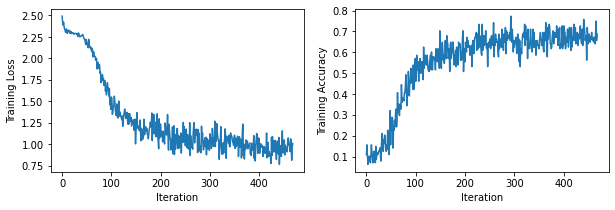

In [9]:
fig = plt.figure(figsize=(10,3))
plt.subplot(121)
plt.plot(losses)
plt.xlabel("Iteration")
plt.ylabel("Training Loss")
plt.subplot(122)
plt.plot(accuracies)
plt.xlabel("Iteration")
plt.ylabel("Training Accuracy")
plt.show()